Kim Thach

**ECGR 5090 - C01**

*800793249*

1. SVM & PCA
2. SVR Regression
                                                                

# Import Libraries and Data

Import required libraries and data needed.


In [1]:
# Initialize some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [2]:
# Read in Cancer dataset
df = load_breast_cancer()
datab = df.data
datab.shape
data_in = pd.DataFrame(datab)


## Clean Data


In [3]:
b_labels = df.target
b_labels.shape
#
labels = np.reshape(b_labels,(569,1))
finalb_data = np.concatenate([datab,labels],axis=1)
#
b_dataset = pd.DataFrame(finalb_data)
features = df.feature_names
# 
features_labels = np.append(features,'label')
b_dataset.columns = features_labels
b_dataset.head()

# If we don't want to work with binary data
#b_dataset['label'].replace(0,'Benign',inplace=True)
#b_dataset['label'].replace(1,'Malignant',inplace=True)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Problem 1

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3.

Make sure to explain and elaborate your results.


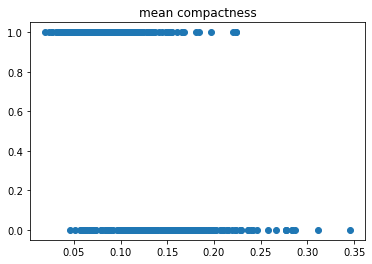

In [4]:
# Plot the current dataset Plotting random feature.
plt.figure()
plt.title(features[5])
plt.scatter(b_dataset[features[5]],b_dataset.label)

In [5]:

b_dataset['label'].replace(0,'Benign',inplace=True)
b_dataset['label'].replace(1,'Malignant',inplace=True)

from sklearn.preprocessing import StandardScaler 

# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']


# Standardizing the features 
x = StandardScaler().fit_transform(x) 

In [6]:
# Perform PCA on dataset. 
from sklearn.decomposition import PCA

pca=(PCA(n_components = 2))
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns = ['principal component 1','principal component 2'])
finalDF = pd.concat([principalDF, b_dataset[['label']]], axis = 1)

data = pd.DataFrame.copy(finalDF)


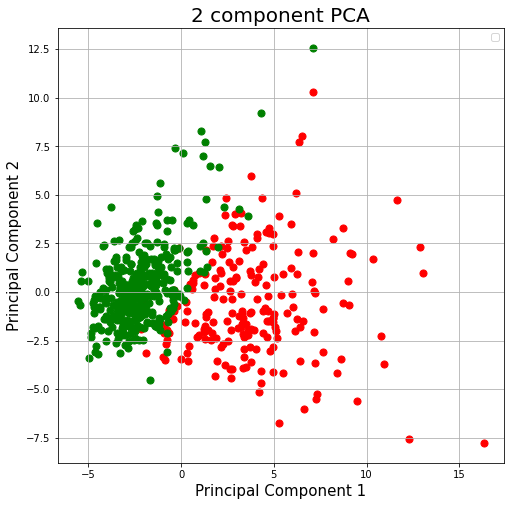

In [7]:
fig = plt.figure(figsize = (8,8)) 

ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
labels = ['Benign','Malignant'] 
colors = ['r', 'g'] 
ax.legend(labels) 

for labels, color in zip(labels,colors): 
    indicesToKeep = finalDF['label'] == labels
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'] 
               , finalDF.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 

ax.grid() 

In [8]:
y = finalDF['label']
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)

fx = ['principal component 1','principal component 2']
x = finalDF[fx]
print(x)

     principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
..                     ...                    ...
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637

[569 rows x 2 columns]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)


In [15]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x_train,y_train)


SVC(C=10000000000.0, kernel='linear')

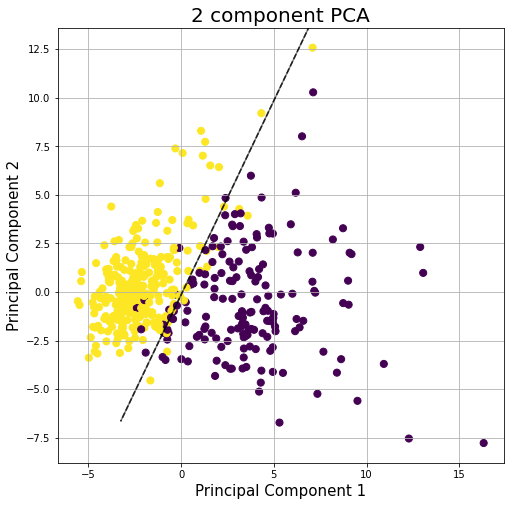

In [19]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model 
    x1 = np.linspace(xlim[0],xlim[1],30)
    y1 = np.linspace(xlim[0],xlim[1],30)
    Y1, X1 = np.meshgrid(y1,x1)
    xy1 = np.vstack([X1.ravel(), Y1.ravel()]).T
    P = model.decision_function(xy1).reshape(X1.shape)
    
    # plot decision boundary and margins
    ax.contour(X1,Y1,P, colors='k', levels=[-1,0,1], alpha=0.5,linestyles=['--','-','--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    
fig = plt.figure(figsize = (8,8)) 

ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 

ax.scatter(x_train['principal component 1'] 
           , x_train['principal component 2'] 
           , c = y_train
           , s = 50) 
ax.grid() 


plot_svc_decision_function(model);

In [21]:
Y_pred = model.predict(x_test)

In [22]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,Y_pred))
print("Precision:",metrics.precision_score(y_test,Y_pred))
print("Recall:",metrics.recall_score(y_test,Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0


In [ ]:
def pca_iters(K,data):
    pca = PCA(n_components = K) 
    principalComponents = pca.fit_transform(data) 
    principalDf = pd.DataFrame(data = principalComponents)
    finalDF = pd.concat([principalDf, b_dataset[['label']]], axis = 1)
        
    return finalDF       

In [ ]:
# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']

# Standardizing the features 
x = StandardScaler().fit_transform(x) 
